In [1]:
from random import randint
from threading import Thread
from time import sleep, time
from multiprocessing import Process, Array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
criaMatriz = lambda n, z=False: [[0 if z else randint(0, 99) for _ in range(n)] for _ in range(n)]

In [3]:
n = 2 # Tamanho das matrizes

In [4]:
m1, m2 = criaMatriz(n), criaMatriz(n)

In [5]:
m1

[[82, 16], [31, 58]]

In [6]:
m2

[[66, 56], [48, 99]]

In [7]:
def linha(m1, m2, l, resultante):
    for i in range(len(m2)):
        for j in range(len(m2)):
            resultante[l][i] += m1[l][j] * m2[j][i]

In [8]:
def linhaFile(m1, m2, l, resultante):
    for i in range(len(m2)):
        for j in range(len(m2)):
            resultante[l][i] += m1[l][j] * m2[j][i]
    
    with open('resultante.txt', 'a') as f:
        f.write(f'{resultante[l]}\n')

In [9]:
def multThrd(m1, m2, n):
    resultante = criaMatriz(n, z=True)
    lista = [Thread(target=linha, args=(m1, m2, i, resultante)) for i in range(n)]
    for t in lista:
        t.start()
    for t in lista:
        t.join()    
    return resultante

In [10]:
def multProcss(m1, m2, n):
    with open('resultante.txt', 'w') as f:
        resultante = criaMatriz(n, z=True)
        lista = [Process(target=linhaFile, args=(m1, m2, i, resultante)) for i in range(n)]
        for t in lista:
            t.start()
        for t in lista:
            t.join()

    with open('resultante.txt', 'r') as f:
        resultante = [list(map(int, line.strip('[]\n').split(', '))) for line in f.readlines()]

    return resultante

In [11]:
aux2 = multProcss(m1, m2, n)
aux2

[[6180, 6176], [4830, 7478]]

In [12]:
t = time()
aux = multThrd(m1, m2, n)
print(f"Tempo de execução: {time() - t}")
print(aux)

Tempo de execução: 0.0006256103515625
[[6180, 6176], [4830, 7478]]


In [13]:
sel = lambda op, m1, m2, n: multThrd(m1, m2, n) if op == 1 else multProcss(m1, m2, n)
selFile = lambda op: 'threads.csv' if op == 1 else 'processos.csv'

In [14]:
def marcaTempo(m1, m2, n, op):
    t = time()
    _ = sel(op, m1, m2, n)
    with open(selFile(op), 'a') as f:
        f.write(f'{n},{time() - t}\n')
    

In [15]:
def testes(max=50):
    for n in range(2, max+1):
        m1, m2 = criaMatriz(n), criaMatriz(n)
        marcaTempo(m1, m2, n, 1); marcaTempo(m1, m2, n, 2)

In [16]:
testes()

In [17]:
df = pd.read_csv('threads.csv', names=['n', 'tempo'])
df2 = pd.read_csv('processos.csv', names=['n', 'tempo'])


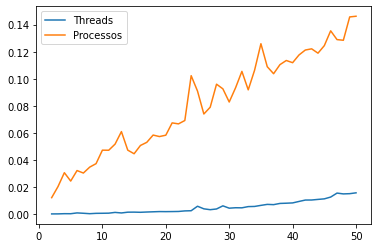

In [20]:
plt.plot(df['n'], df['tempo'], label='Threads')
plt.plot(df2['n'], df2['tempo'], label='Processos')
plt.legend()
plt.show()
